## Exploratory Data Analysis (EDA) with Pandas in Spotify songs dataset

### The purpose of this project is to master the exploratory data analysis (EDA) with Pandas framework.

### Goals of the Project:

- Explore a spotify songs dataset with Pandas framework.
- Build pivot tables.
- Visualize the dataset with various plot types.

### Materials

The data that we are going to use for this is a set of an open source kaggle website: https://www.kaggle.com/datasets/ektanegi/spotifydata-19212020.

### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

warnings.filterwarnings("ignore") # Ignore warnings

### Data overview

In [2]:
# Reading csv file and droping duplicates

songs_data = pd.read_csv("dataset.csv").drop_duplicates(["track_name", "artists", "album_name"])
print(songs_data.head(5))
print(songs_data.tail(5))

   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


In [3]:
# Deleting useless columns in dataset

songs = songs_data.drop([
    "Unnamed: 0",
    "album_name",
    "track_name",
    "track_id",
    "artists",
    "key",
    "loudness",
    "mode",
    "tempo",
    "time_signature",
    "acousticness"
], axis="columns")
songs.head(10)

,popularity,duration_ms,explicit,danceability,energy,speechiness,instrumentalness,liveness,valence,track_genre
0,73,230666,False,0.676,0.4610,0.1430,0.000001,0.3580,0.7150,acoustic
1,55,149610,False,0.420,0.1660,0.0763,0.000006,0.1010,0.2670,acoustic
2,57,210826,False,0.438,0.3590,0.0557,0.000000,0.1170,0.1200,acoustic
3,71,201933,False,0.266,0.0596,0.0363,0.000071,0.1320,0.1430,acoustic
4,82,198853,False,0.618,0.4430,0.0526,0.000000,0.0829,0.1670,acoustic
5,58,214240,False,0.688,0.4810,0.1050,0.000000,0.1890,0.6660,acoustic
6,74,229400,False,0.407,0.1470,0.0355,0.000003,0.0913,0.0765,acoustic
7,80,242946,False,0.703,0.4440,0.0417,0.000000,0.0973,0.7120,acoustic
8,74,189613,False,0.625,0.4140,0.0369,0.000000,0.1510,0.6690,acoustic
9,56,205594,False,0.442,0.6320,0.0295,0.004190,0.0735,0.1960,acoustic


In [4]:
songs.shape # Checking the shape of our data

(89380, 10)

In [5]:
songs.describe() # Looking at the descriptive statistics

,popularity,duration_ms,danceability,energy,speechiness,instrumentalness,liveness,valence
count,89380.000000,8.938000e+04,89380.000000,89380.000000,89380.000000,89380.000000,89380.000000,89380.000000
mean,33.209644,2.291223e+05,0.562153,0.634362,0.087452,0.173563,0.217086,0.469558
std,20.564596,1.130174e+05,0.176695,0.256677,0.113383,0.323968,0.195009,0.262919
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,1.729955e+05,0.450000,0.457000,0.036000,0.000000,0.098200,0.249000
50%,33.000000,2.132800e+05,0.576000,0.676000,0.048900,0.000058,0.132000,0.457000
75%,49.000000,2.642660e+05,0.692000,0.853000,0.085800,0.097800,0.279000,0.683000
max,100.000000,5.237295e+06,0.985000,1.000000,0.965000,1.000000,1.000000,0.995000


In [6]:
songs.describe(include="object") # Looking at the descriptive statistics including object-type

,track_genre
count,89380
unique,113
top,cantopop
freq,999


array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>, <AxesSubplot:>]],
      dtype=object)

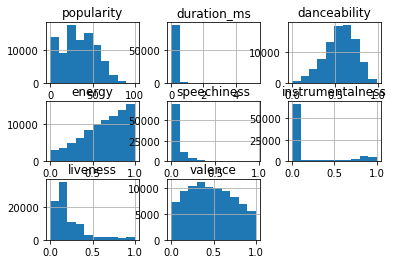

In [7]:
songs.hist()

array([[<AxesSubplot:xlabel='popularity', ylabel='popularity'>,
        <AxesSubplot:xlabel='duration_ms', ylabel='popularity'>,
        <AxesSubplot:xlabel='danceability', ylabel='popularity'>,
        <AxesSubplot:xlabel='energy', ylabel='popularity'>,
        <AxesSubplot:xlabel='speechiness', ylabel='popularity'>,
        <AxesSubplot:xlabel='instrumentalness', ylabel='popularity'>,
        <AxesSubplot:xlabel='liveness', ylabel='popularity'>,
        <AxesSubplot:xlabel='valence', ylabel='popularity'>],
       [<AxesSubplot:xlabel='popularity', ylabel='duration_ms'>,
        <AxesSubplot:xlabel='duration_ms', ylabel='duration_ms'>,
        <AxesSubplot:xlabel='danceability', ylabel='duration_ms'>,
        <AxesSubplot:xlabel='energy', ylabel='duration_ms'>,
        <AxesSubplot:xlabel='speechiness', ylabel='duration_ms'>,
        <AxesSubplot:xlabel='instrumentalness', ylabel='duration_ms'>,
        <AxesSubplot:xlabel='liveness', ylabel='duration_ms'>,
        <AxesSubplot:xlabel

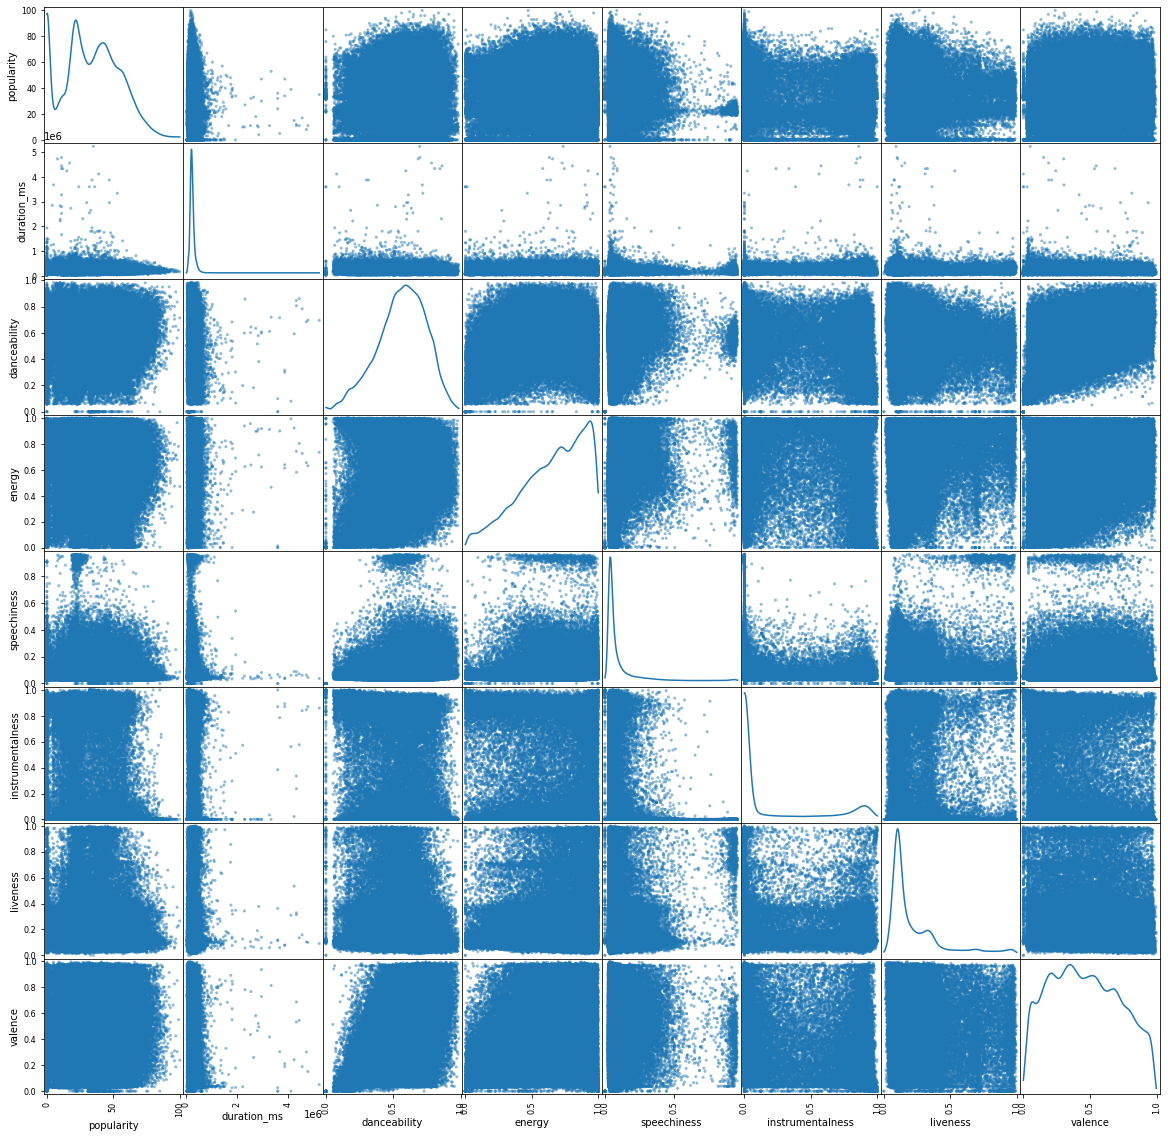

In [8]:
pd.plotting.scatter_matrix(
    songs[['popularity', 'duration_ms', 'danceability', 'energy', 'speechiness', 'instrumentalness', 'liveness', 'valence']],
    figsize=(20,20),
    diagonal="kde"
)

##### Observation:
- By looking at these plots, we can see that the variables "popularity", "danceability", "energy" and "valence" are almost normally distributed.

#### Checking for missing values

In [9]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89380 entries, 0 to 113999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        89380 non-null  int64  
 1   duration_ms       89380 non-null  int64  
 2   explicit          89380 non-null  bool   
 3   danceability      89380 non-null  float64
 4   energy            89380 non-null  float64
 5   speechiness       89380 non-null  float64
 6   instrumentalness  89380 non-null  float64
 7   liveness          89380 non-null  float64
 8   valence           89380 non-null  float64
 9   track_genre       89380 non-null  object 
dtypes: bool(1), float64(6), int64(2), object(1)
memory usage: 6.9+ MB


As we can see there's no missing values in dataset

### Plotting heatmap in order to see the correlation between the values

<AxesSubplot:title={'left':'Spotify songs heatmap'}>

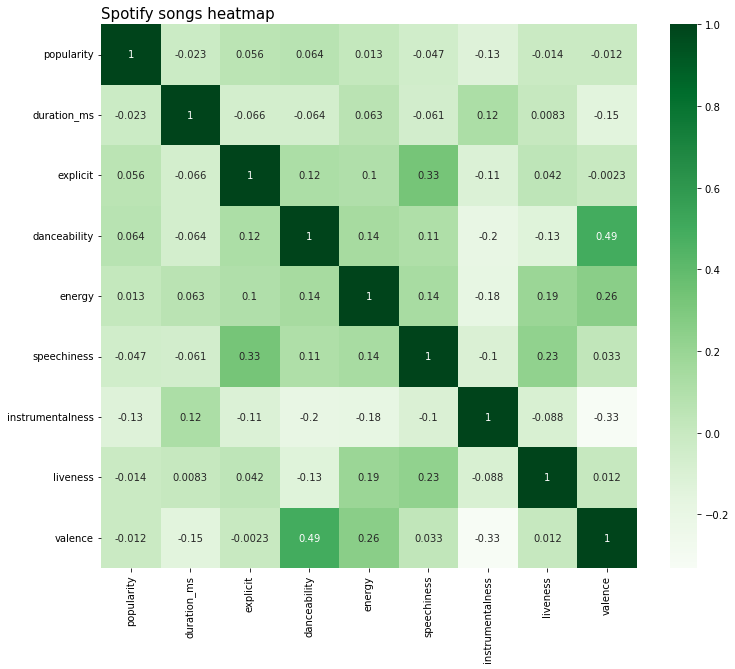

In [10]:
corr = songs.corr()
plt.subplots(figsize=(12,10))
plt.title("Spotify songs heatmap", loc="left", fontdict={"fontsize": 15})
sb.heatmap(data=corr, annot=True, cmap="Greens")

##### Observation:
- Here we can see a pretty big correlation between "danceability" and "valence" variables.

### Data factorization, creating the "y" - target variable and transforming duration into minutes

In [11]:
def factorization(popularity):
    if popularity >= 0 and popularity < 25:
        return "Unpopular"
    elif popularity >= 25 and popularity < 50:
        return "Available popular"
    elif popularity >= 50 and popularity < 75:
        return "Moderately popular"
    elif popularity >= 75 and popularity <= 100:
        return "Very popular"

songs["y"] = songs.popularity.apply(factorization)
songs["duration_ms"] = songs.duration_ms.apply(lambda x: x/60000) # Converting into minutes
songs.rename(columns={"duration_ms": "duration_m"}, inplace=True)
songs

,popularity,duration_m,explicit,danceability,energy,speechiness,instrumentalness,liveness,valence,track_genre,y
0,73,3.844433,False,0.676,0.4610,0.1430,0.000001,0.3580,0.7150,acoustic,Moderately popular
1,55,2.493500,False,0.420,0.1660,0.0763,0.000006,0.1010,0.2670,acoustic,Moderately popular
2,57,3.513767,False,0.438,0.3590,0.0557,0.000000,0.1170,0.1200,acoustic,Moderately popular
3,71,3.365550,False,0.266,0.0596,0.0363,0.000071,0.1320,0.1430,acoustic,Moderately popular
4,82,3.314217,False,0.618,0.4430,0.0526,0.000000,0.0829,0.1670,acoustic,Very popular
...,...,...,...,...,...,...,...,...,...,...,...
113995,21,6.416650,False,0.172,0.2350,0.0422,0.928000,0.0863,0.0339,world-music,Unpopular
113996,22,6.416667,False,0.174,0.1170,0.0401,0.976000,0.1050,0.0350,world-music,Unpopular
113997,22,4.524433,False,0.629,0.3290,0.0420,0.000000,0.0839,0.7430,world-music,Unpopular
113998,41,4.731550,False,0.587,0.5060,0.0297,0.000000,0.2700,0.4130,world-music,Available popular


### Plotting the histogram of song's duration in minutes 

<AxesSubplot:title={'center':'Duration in minutes distributions'}, xlabel='y', ylabel='duration_m'>

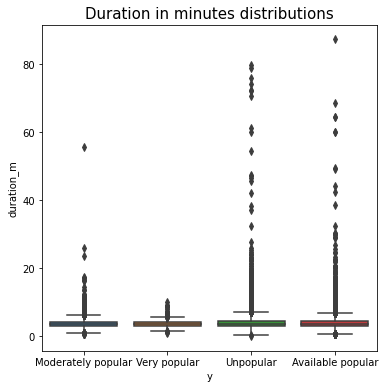

In [12]:
plt.subplots(figsize=(6,6))
plt.title("Duration in minutes distributions", loc="center", fontdict={"fontsize": 15})
sb.boxplot(data = songs, x = "y", y = "duration_m")

#### Here we have a lot of outlies, so let's to get rid of it:

In [13]:
count = int(songs.duration_m.count() * 0.99) # Getting a 99% of data to reduce the amount of outlies
without_outlies = songs.sort_values(by = "duration_m", ascending=True).head(count)

<AxesSubplot:title={'center':'Duration in minutes distributions'}, xlabel='y', ylabel='duration_m'>

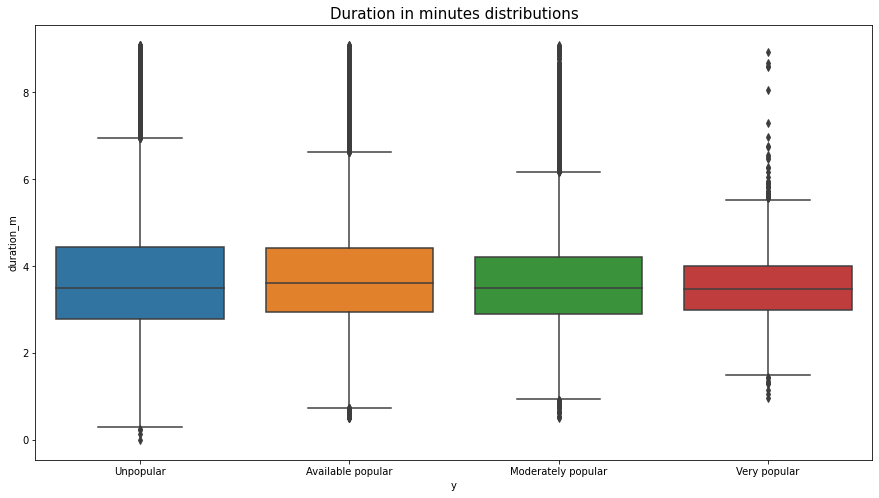

In [14]:
plt.subplots(figsize=(15,8))
plt.title("Duration in minutes distributions", loc="center", fontdict={"fontsize": 15})
sb.boxplot(data = without_outlies, x = "y", y = "duration_m")

##### Observation:
- The means of the songs' durations don't differ significantly.

### Checking the percentage of explicit lyrics in each popularity factor

In [15]:
data = pd.crosstab(index = songs.y, columns = songs.explicit)
data["Ratio"] = round(data[1] / data[0], 4)
data

explicit,False,True,Ratio
y,,,
Available popular,32492,2570,0.0791
Moderately popular,17454,2138,0.1225
Unpopular,30608,2610,0.0853
Very popular,1173,335,0.2856


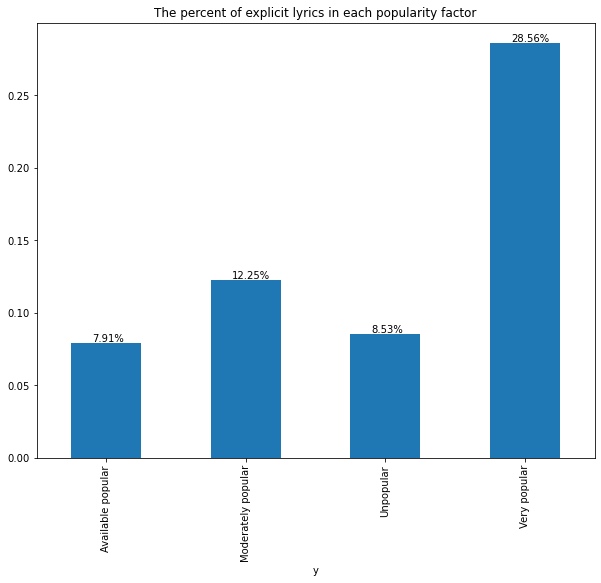

In [16]:
plt.subplots(figsize=(10,8))
plt.title("The percent of explicit lyrics in each popularity factor")
data.Ratio.plot(kind="bar")

for i, v in data.reset_index().iterrows():
    txt = f"{round(v.Ratio * 100, 2)}%"
    plt.text(i-0.1, v.Ratio + 0.001, txt)

##### Observation:
- "Very popular" category has the greatest percent of songs with explicit lyrics.

### Checking the danceability distribution

<AxesSubplot:title={'center':'Danceability distribution'}, xlabel='danceability'>

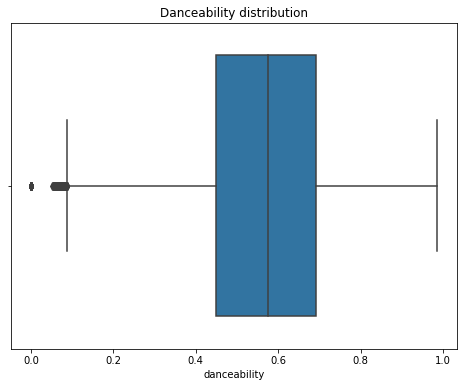

In [17]:
plt.subplots(figsize=(8,6))
plt.title("Danceability distribution")
sb.boxplot(x = songs.danceability)

<AxesSubplot:title={'center':'Danceability distributions'}, xlabel='y', ylabel='danceability'>

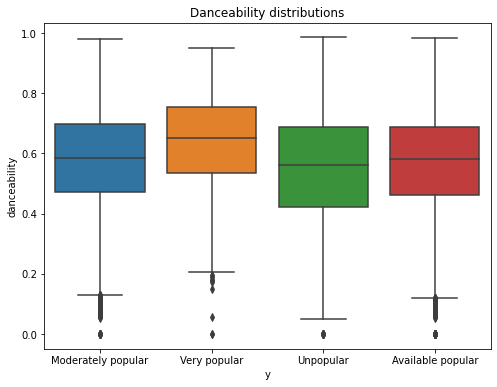

In [19]:
plt.subplots(figsize=(8,6))
plt.title("Danceability distributions")
sb.boxplot(x = songs.y, y = songs.danceability)

##### Observation:
- Very popular category of songs has a bit more mean danceability score.

In [ ]:
def factorization(factor):
    if factor >= 0 and factor < 0.25:
        return "Not danceable"
    elif factor >= 0.25 and factor < 0.50:
        return "Relatively danceable"
    elif factor >= 0.50 and factor < 0.75:
        return "Pretty danceable"
    elif factor >= 0.75 and factor <= 1:
        return "Very danceable"

data = songs[["popularity", "y", "danceability"]]
data["danceability_fac"] = data.danceability.apply(factorization)
data

,popularity,y,danceability,danceability_fac
0,73,Moderately popular,0.676,Pretty danceable
1,55,Moderately popular,0.420,Relatively danceable
2,57,Moderately popular,0.438,Relatively danceable
3,71,Moderately popular,0.266,Relatively danceable
4,82,Very popular,0.618,Pretty danceable
...,...,...,...,...
113995,21,Unpopular,0.172,Not danceable
113996,22,Unpopular,0.174,Not danceable
113997,22,Unpopular,0.629,Pretty danceable
113998,41,Available popular,0.587,Pretty danceable


In [ ]:
g_data = pd.crosstab(index = data.y, columns = data.danceability_fac)
g_data["Amount"] = g_data['Not danceable']+g_data['Pretty danceable']+g_data['Relatively danceable']+g_data['Very danceable']

for col in g_data.iloc[:, 0:4]:
    g_data[col] = round(g_data[col]/g_data.Amount, 2)
g_data

danceability_fac,Not danceable,Pretty danceable,Relatively danceable,Very danceable,Amount
y,,,,,
Available popular,0.04,0.54,0.28,0.13,35062
Moderately popular,0.04,0.54,0.27,0.15,19592
Unpopular,0.08,0.47,0.30,0.15,33218
Very popular,0.01,0.55,0.18,0.26,1508


Text(0.0, 1.0, 'Percent of songs included in particular factor')

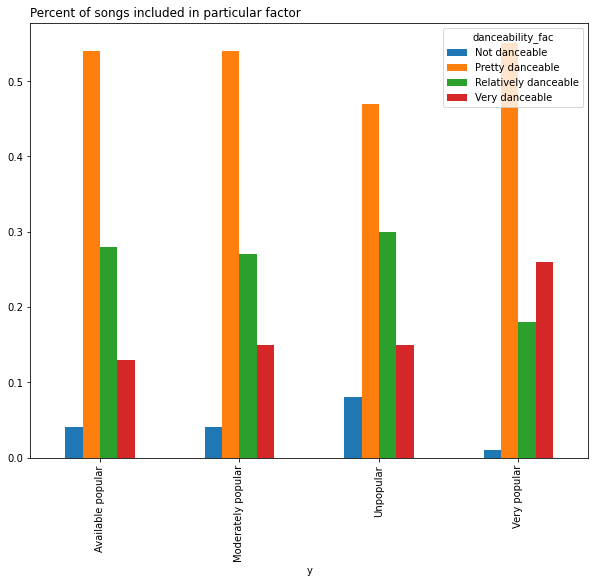

In [ ]:
g_data = g_data.iloc[:, 0:4]

g_data.plot(kind="bar", figsize=(10,8))
plt.title("Percent of songs included in particular factor", loc="left")

##### Observation:
- This barchart shows that "Unpopular" category has the biggest percent of "not danceable" and "relatively danceable" songs, at the same time category "Very popular" has the lowest. In additional "Very popular" category has bigger percent of "very danceable" and "pretty danceable" songs than others.

### Checking the songs' energy distibution

In [ ]:
data = songs.loc[:, ["popularity", "energy", "y"]]
data

,popularity,energy,y
0,73,0.4610,Moderately popular
1,55,0.1660,Moderately popular
2,57,0.3590,Moderately popular
3,71,0.0596,Moderately popular
4,82,0.4430,Very popular
...,...,...,...
113995,21,0.2350,Unpopular
113996,22,0.1170,Unpopular
113997,22,0.3290,Unpopular
113998,41,0.5060,Available popular


<AxesSubplot:xlabel='y', ylabel='energy'>

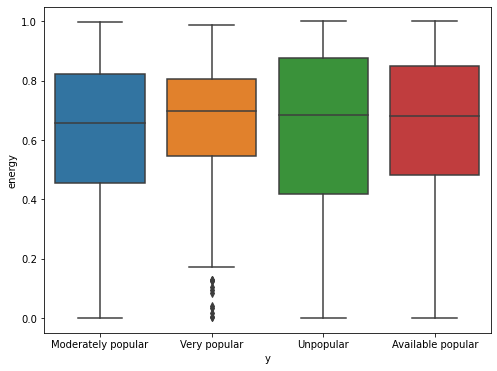

In [ ]:
plt.subplots(figsize=(8,6))
sb.boxplot(x = data.y, y = data.energy)

In [ ]:
def factorization(factor):
    if factor >= 0 and factor < 0.25:
        return "Not energy"
    elif factor >= 0.25 and factor < 0.50:
        return "Relatively energy"
    elif factor >= 0.50 and factor < 0.75:
        return "Quite energy"
    elif factor >= 0.75 and factor <= 1.0:
        return "Very energy"

data["energy_fac"] = data.energy.apply(factorization)

In [ ]:
grouped_data = pd.crosstab(index=data.y, columns=data.energy_fac)
grouped_data["Amount"] = grouped_data["Not energy"] + grouped_data["Quite energy"] + grouped_data["Relatively energy"] + grouped_data["Very energy"]
for col in grouped_data.iloc[:, 0:4]:
    grouped_data[col] = round(grouped_data[col]/grouped_data.Amount, 2)
grouped_data

energy_fac,Not energy,Quite energy,Relatively energy,Very energy,Amount
y,,,,,
Available popular,0.08,0.33,0.19,0.40,35062
Moderately popular,0.10,0.34,0.21,0.36,19592
Unpopular,0.13,0.27,0.19,0.42,33218
Very popular,0.02,0.44,0.17,0.37,1508


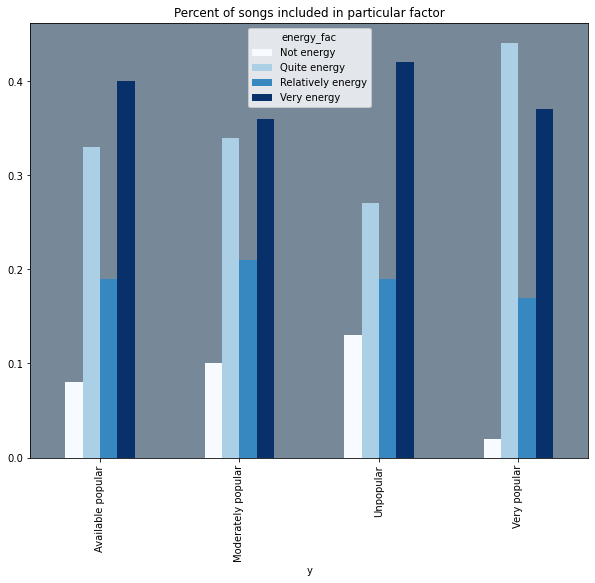

In [ ]:
ax = grouped_data.iloc[:, 0:4].plot(kind = "bar", figsize=(10,8), colormap="Blues")
ax.set_title("Percent of songs included in particular factor")
ax.set_facecolor("lightslategray")

##### Observation:
- "Very popular category" has almost no "Not energetic" songs, "very energy" ratio are almost the same value in each category but "unpopular" has the biggest that is equal to 42%.

### Checking the speechiness distribution

Working with 95% of data to get rid of outlies

<AxesSubplot:xlabel='y', ylabel='speechiness'>

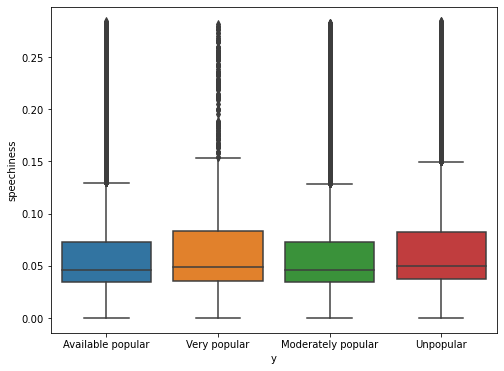

In [ ]:
count = int(songs.speechiness.count() * 0.95)
without_outlies = songs.sort_values(by = "speechiness", ascending=True).head(count)
plt.figure(figsize=(8,6))
sb.boxplot(x=without_outlies.y, y=without_outlies.speechiness)

##### Observation:
- As we can see "speechiness" means are almost similar in each category. That means that this variable doesn't have the significant correlation with our target-variable.

### Checking the instrumental factor distribution

<AxesSubplot:xlabel='y', ylabel='instrumentalness'>

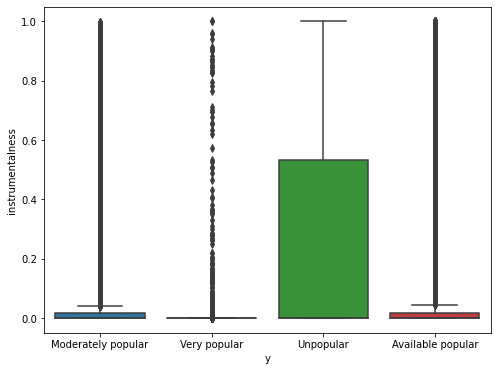

In [ ]:
plt.figure(figsize=(8,6))
sb.boxplot(x = songs.y, y = songs.instrumentalness)

In [ ]:
def factorization(factor):
    if factor >= 0 and factor < 0.25:
        return "Not instrumental"
    elif factor >= 0.25 and factor < 0.5:
        return "Slightly instrumental"
    elif factor >= 0.5 and factor < 0.75:
        return "Pretty instrumental"
    elif factor >= 0.75 and factor <= 1:
        return "Very instrumental"
data = songs[["instrumentalness", "y"]]
data["instrumentalness_fac"] = data.instrumentalness.apply(factorization)
data = pd.crosstab(index=data.y, columns=data.instrumentalness_fac)
data["Amount"] = data["Not instrumental"] + data["Pretty instrumental"] + data["Slightly instrumental"] + data["Very instrumental"]

for col in data.columns:
    data[col] = round(data[col]/data.Amount, 2)
data

instrumentalness_fac,Not instrumental,Pretty instrumental,Slightly instrumental,Very instrumental,Amount
y,,,,,
Available popular,0.82,0.03,0.03,0.12,1.0
Moderately popular,0.84,0.03,0.03,0.10,1.0
Unpopular,0.70,0.06,0.04,0.20,1.0
Very popular,0.96,0.01,0.01,0.01,1.0


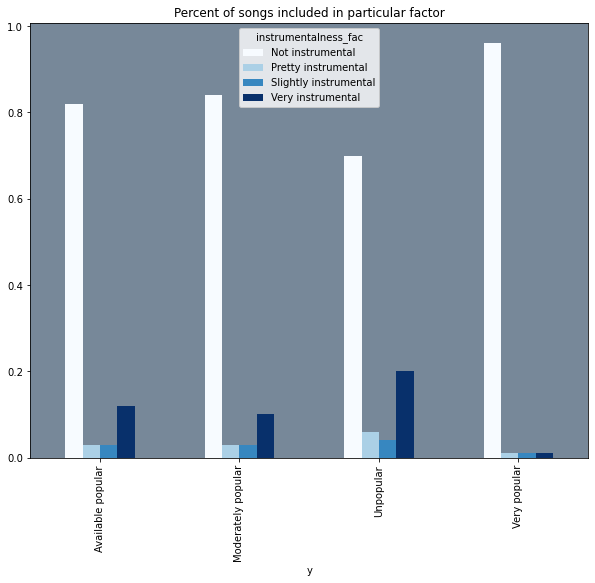

In [ ]:
ax = data.iloc[:, 0:4].plot(kind = "bar", figsize=(10,8), colormap="Blues")
ax.set_title("Percent of songs included in particular factor")
ax.set_facecolor("lightslategray")

##### Observation:
- "Very popular" category has the biggest ration of "not instrumental" factor that is equal to 96%.

### Checking the liveness factor distribution 

<AxesSubplot:xlabel='y', ylabel='liveness'>

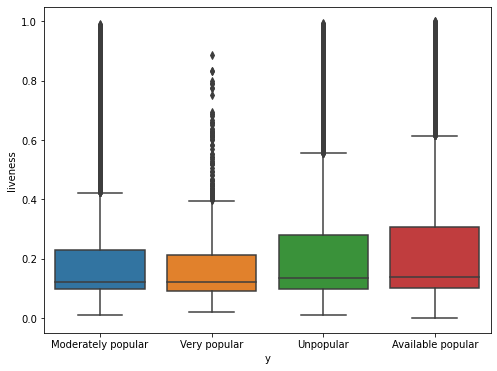

In [ ]:
plt.figure(figsize=(8,6))
sb.boxplot(x=songs.y, y=songs.liveness)

##### Observation:
- Liveness distributions are almost similar in each category.

### Checking the valence factor distribution

<AxesSubplot:xlabel='y', ylabel='valence'>

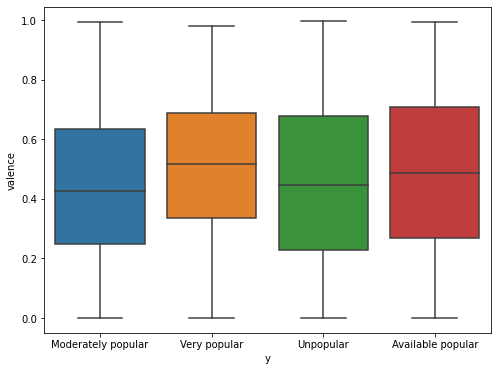

In [ ]:
plt.figure(figsize=(8,6))
sb.boxplot(x=songs.y, y=songs.valence)

##### Observation:
- The mean of valence in "very popular category" is a little more than the rest

### Checking the track genre factor distribution

In [ ]:
data = pd.crosstab(index=songs.y, columns=songs.track_genre)
data["Total"] = data.sum(axis=1)

for col in data.columns:
    data[col] = round(data[col]/data.Total, 2)
data

track_genre,acoustic,afrobeat,alt-rock,alternative,ambient,anime,black-metal,bluegrass,blues,brazil,...,study,swedish,synth-pop,tango,techno,trance,trip-hop,turkish,world-music,Total
y,,,,,,,,,,,,,,,,,,,,,
Available popular,0.01,0.01,0.01,0.00,0.01,0.01,0.00,0.01,0.01,0.02,...,0.02,0.01,0.01,0.00,0.01,0.01,0.01,0.02,0.02,1.0
Moderately popular,0.02,0.00,0.01,0.00,0.03,0.03,0.00,0.00,0.02,0.01,...,0.00,0.01,0.01,0.00,0.01,0.01,0.01,0.00,0.01,1.0
Unpopular,0.00,0.02,0.01,0.01,0.00,0.00,0.02,0.02,0.01,0.00,...,0.01,0.00,0.01,0.03,0.00,0.00,0.01,0.00,0.00,1.0
Very popular,0.00,0.00,0.06,0.02,0.00,0.01,0.00,0.00,0.01,0.00,...,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0


Text(0.5, 1.0, "Available popular's dominant genres")

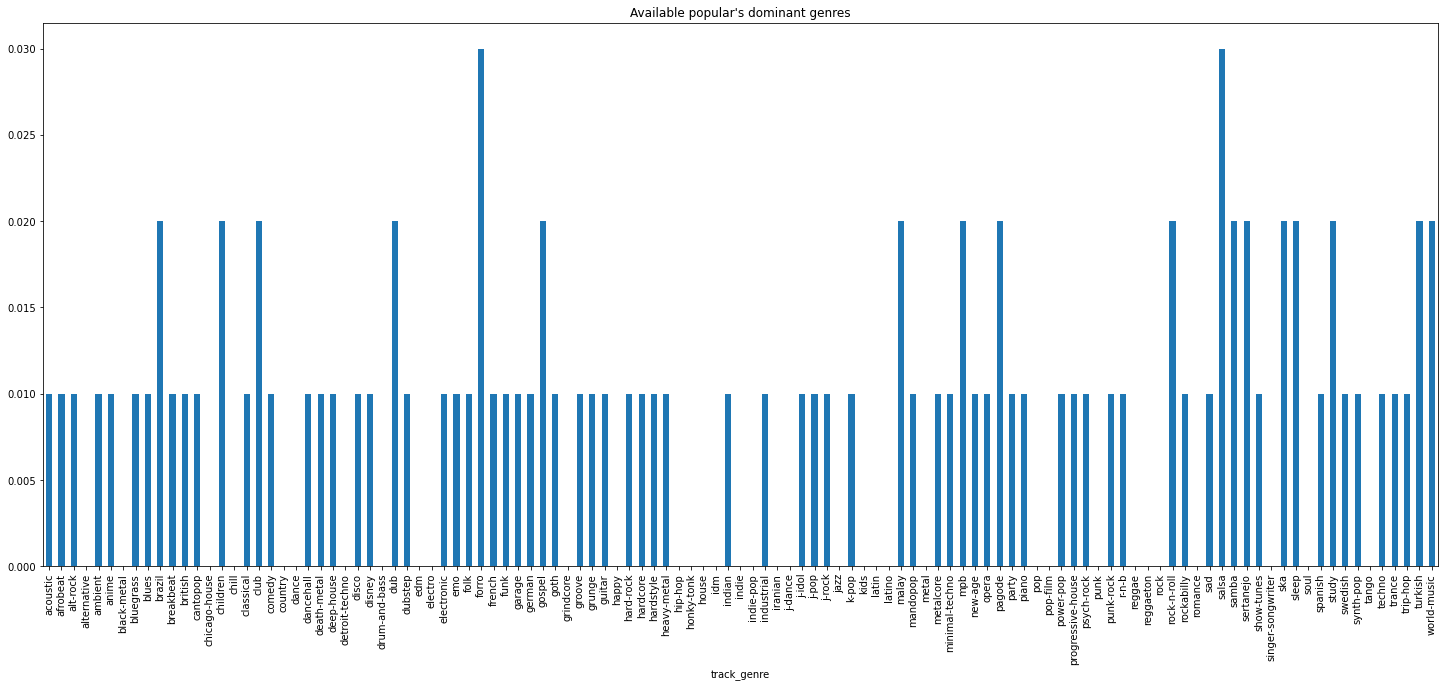

In [ ]:
plot = data.iloc[0, 0:data.shape[1]-1].plot(kind="bar", figsize=(25,10))
plot.set_title("Available popular's dominant genres")

Text(0.5, 1.0, "Moderately popular's dominant genres")

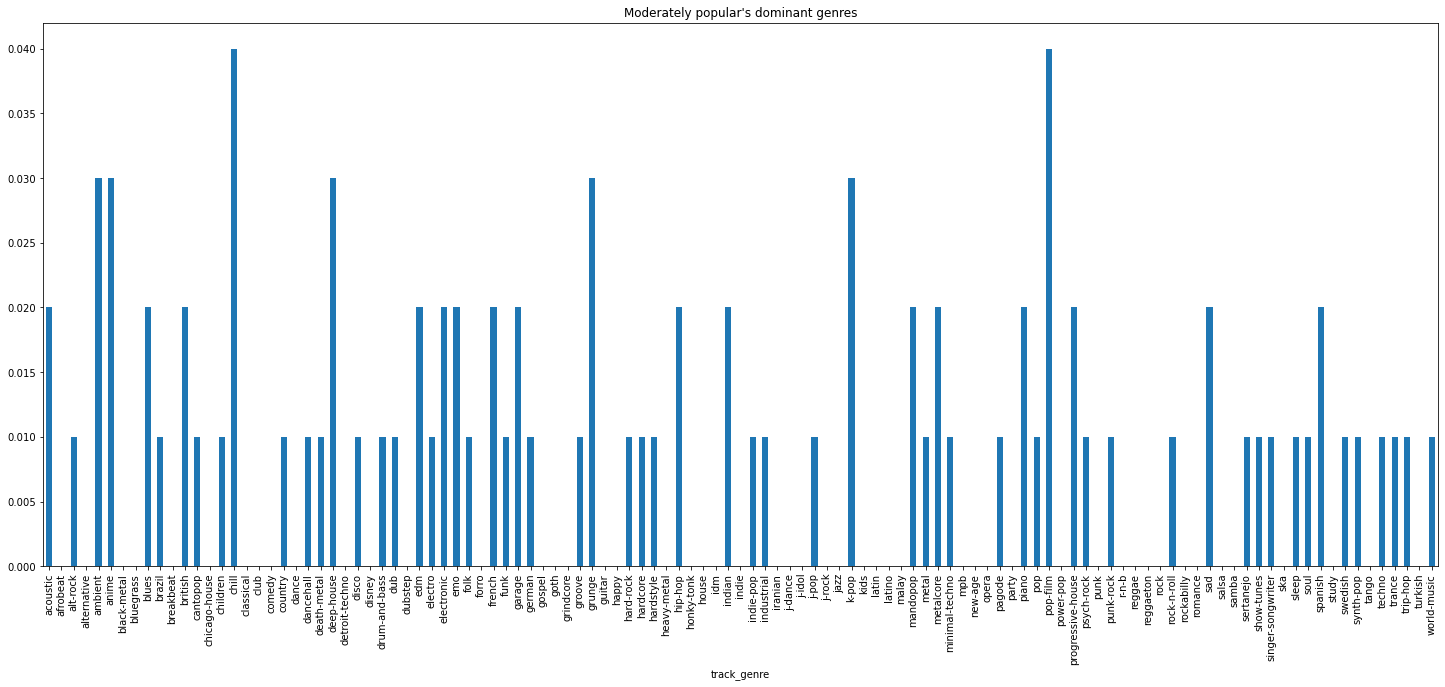

In [ ]:
plot = data.iloc[1, 0:data.shape[1]-1].plot(kind="bar", figsize=(25,10))
plot.set_title("Moderately popular's dominant genres")

Text(0.5, 1.0, "Unpopular's dominant genres")

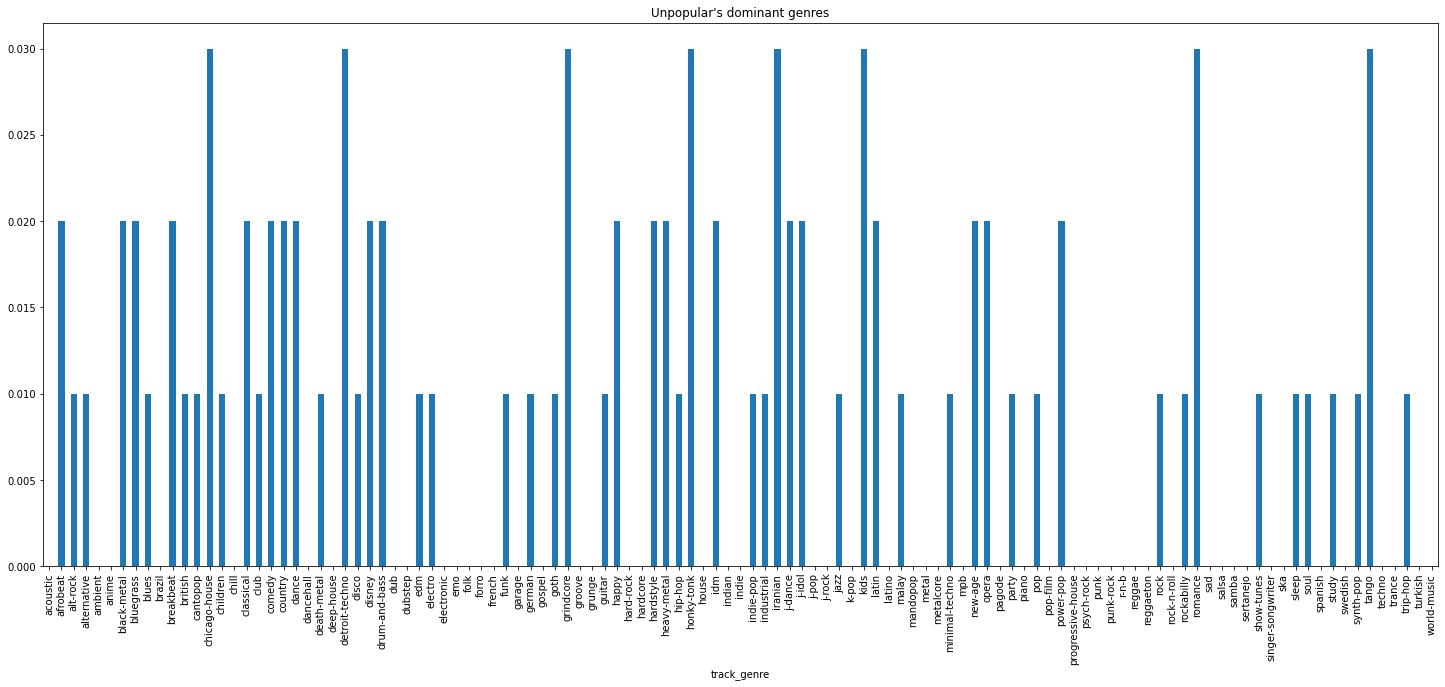

In [ ]:
plot = data.iloc[2, 0:data.shape[1]-1].plot(kind="bar", figsize=(25,10))
plot.set_title("Unpopular's dominant genres")

Text(0.5, 1.0, "Very popular's dominant genres")

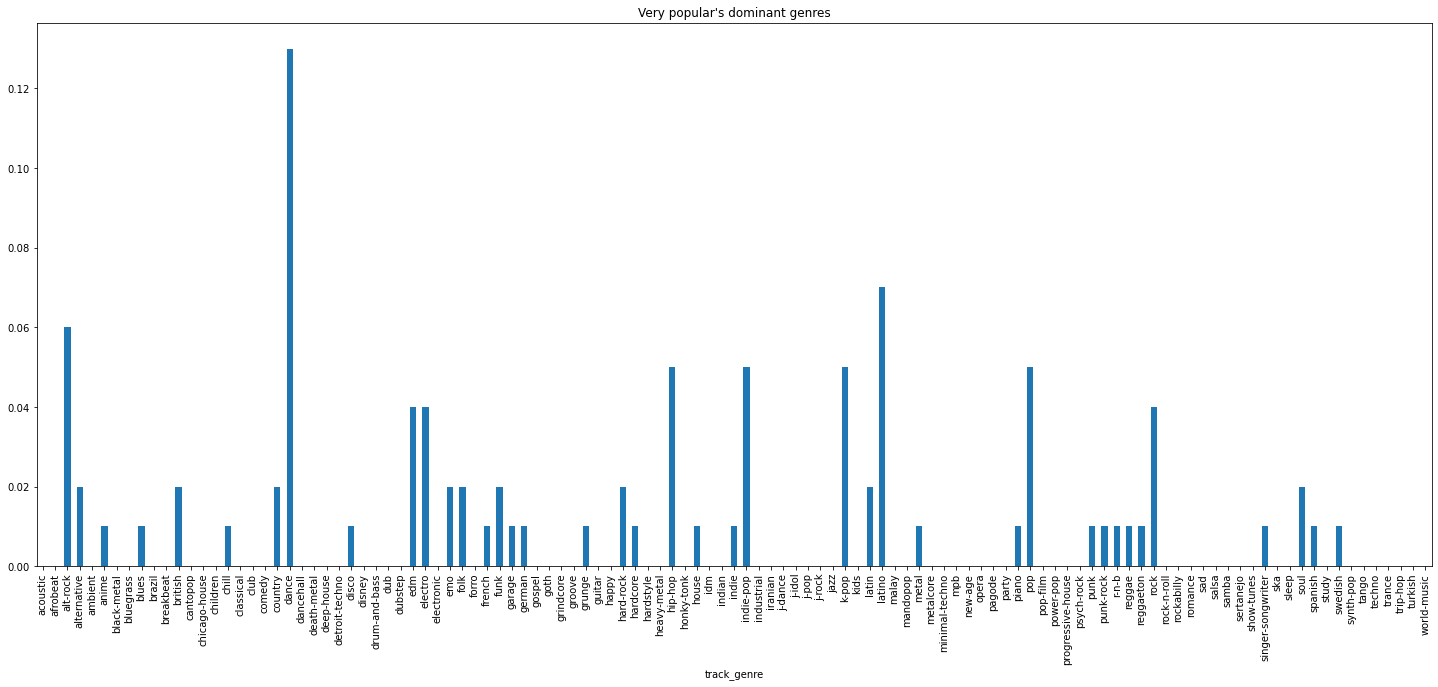

In [ ]:
plot = data.iloc[3, 0:data.shape[1]-1].plot(kind="bar", figsize=(25,10))
plot.set_title("Very popular's dominant genres")

##### Observation:
- These bar charts show that "very popular" category mostly includes dance songs (more than 12 percent). "Unpopular" includes a lot of genres such as chicago-house, detroit-techno, grindcore, honky-tonk, iranian, kids etc.

### Conclusions:
- Variables "popularity", "danceability", "energy" and "valence" are almost normally distributed.
- Variables "danceability" and "valence" have a pretty big correlation.
- "Very popular" category has the greatest percent of songs with explicit lyrics.
- "Unpopular" category has the biggest percent of "not danceable" and "relatively danceable" songs, at the same time category "Very popular" has the lowest. In additional "Very popular" category has bigger percent of "very danceable" and "pretty danceable" songs than others.
- "Very popular category" has almost no "Not energetic" songs, "very energy" ratio are almost the same value in each category but "unpopular" has the biggest that is equal to 42%.
- "Very popular" category has the biggest ration of "not instrumental" factor that is equal to 96%.
- "Very popular" category mostly includes dance songs (more than 12 percent). "Unpopular" includes a lot of genres such as chicago-house, detroit-techno, grindcore, honky-tonk, iranian, kids etc.